# Predicting Poker Hand

### STEP 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

### STEP 2: LOADING THE DATASET

In [2]:
poker_df = pd.read_csv('data/poker_hand_test.data')
poker_df 

,1,1.1,1.2,13,2,4,2.1,3,1.3,12,0
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


### STEP 3: ANALYSING AND PRE-PROCESSING THE DATA

### STEP 4: CHANGING NAMES OF COLUMN ACCORDING TO THE REFERENCES PROVIDED FROM WHERE THE DATASET IS OBTAINED

In [3]:
poker_df.columns = ['first_suit', 'first_rank', 'second_suit', 'second_rank', 'third_suit', 'third_rank',
'fourth_suit', 'fourth_rank', 'fifth_suit', 'fifth_rank', 'hand']

labels = ['nothing', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush', 'full_house',
'four_of_a_kind', 'straight_flush', 'royal_flush']

poker_df

,first_suit,first_rank,second_suit,second_rank,third_suit,third_rank,fourth_suit,fourth_rank,fifth_suit,fifth_rank,hand
0,3,12,3,2,3,11,4,5,2,5,1
1,1,9,4,6,1,4,3,2,3,9,1
2,1,4,3,13,2,13,2,1,3,6,1
3,3,10,2,7,1,2,2,11,4,9,0
4,1,3,4,5,3,4,1,12,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...
999994,3,1,1,12,2,9,4,9,2,6,1
999995,3,3,4,5,2,7,1,4,4,3,1
999996,1,11,4,7,3,9,1,13,2,7,1
999997,3,11,1,8,1,1,3,13,2,8,1


In [4]:
### 4) SEPERATING THE DATASET INTO FEATURES (X) AND TARGET VALUES (y)
X = poker_df.iloc[:, 0:9]
y = poker_df.hand

### STEP 5: VISUALIZING WHETHER CLASS BALANCE IS PRESENT IN OUR DATASET OR NOT

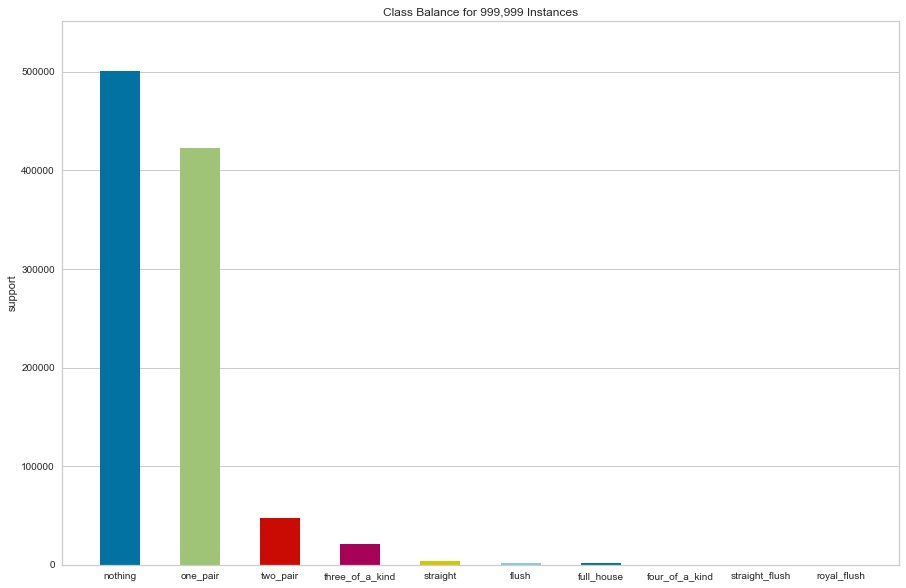

<AxesSubplot:title={'center':'Class Balance for 999,999 Instances'}, ylabel='support'>

In [5]:
from yellowbrick.classifier import ClassBalance, ROCAUC, ClassPredictionError

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

##### THUS THERE IS CLASS IMBALANCE PRESENT IN OUR DATASET, ANS WE MUST REMOVE IT

### STEP 6: UP-SAMPLING FROM MINORITY CLASSES

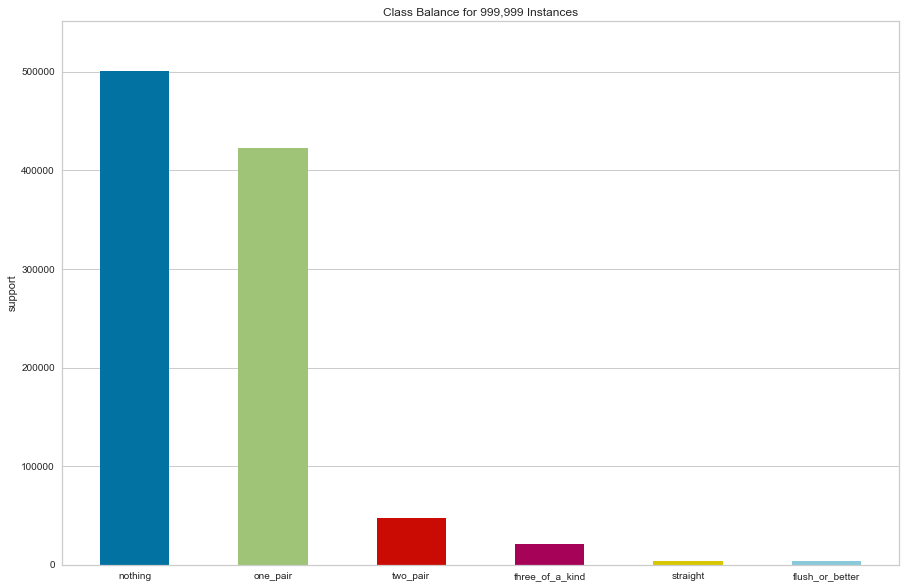

<AxesSubplot:title={'center':'Class Balance for 999,999 Instances'}, ylabel='support'>

In [6]:
poker_df.loc[poker_df['hand']>=5, 'hand'] = 5

y = poker_df.hand

labels = ['nothing', 'one_pair', 'two_pair', 'three_of_a_kind', 'straight', 'flush_or_better']

balance = ClassBalance(size=(1080,720), labels=labels)

balance.fit(y)

balance.show()

### STEP 7: TRAINING THE RANDOM FORESTS CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

#CLF = SVC()
CLF = MLPClassifier(solver = 'adam', alpha = 0.05, hidden_layer_sizes=(50, 100, 50), learning_rate = 'adaptive', activation = 'tanh')

CLF.fit(X_train, y_train)

import matplotlib.pyplot as plt

plt.plot(CLF.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()


### STEP 8: EVALUATING THE MODEL

In [ ]:
#### A) CLASSIFICATION ACCURACY

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score

y_pred_test = CLF.predict(X_test)
y_pred_train = CLF.predict(X_train)

print ("Accuracy of the Model on Train Data is : {}".format(accuracy_score(y_train, y_pred_train)))
print ("Accuracy of the Model on Test Data is : {}".format(accuracy_score(y_test, y_pred_test)))

In [ ]:
### B) ROC CURVE AND AUC:
from yellowbrick.classifier import ROCAUC

rocauc = ROCAUC(CLF, size =(1080, 720), classes = labels)

rocauc.score(X_test, y_test)
rocauc.show()

### STEP 9: CLASSIFICATION REPORT HEATMAP

In [ ]:
from yellowbrick.classifier import ClassificationReport

report = ClassificationReport(CLF, size = (720, 640), classes = labels, cmap = 'PuBu')
report.score(X_test, y_test)
report.show()

### STEP 10: CLASS PREDICTION ERROR

In [ ]:
error = ClassPredictionError(CLF, size= [1080, 720], classes = labels)
error.score(X_test, y_test)
error.poof()